# EDA - US Accidnts 2019

### Reading in the data

In [1]:
import pandas as pd
import pyspark
from   io           import StringIO
import os
import sys
import warnings

import matplotlib.pyplot as plt

import requests
import seaborn as sns

warnings.filterwarnings('ignore')

%pylab inline
%config InlineBackend.figure_formats = ['retina']

Populating the interactive namespace from numpy and matplotlib


In [2]:
spark = pyspark.sql.SparkSession.builder.getOrCreate()

21/12/12 13:58:50 WARN Utils: Your hostname, Amirs-MacBook-Pro.local resolves to a loopback address: 127.0.0.1; using 192.168.0.63 instead (on interface en0)
21/12/12 13:58:50 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
21/12/12 13:58:51 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
21/12/12 13:58:53 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [3]:
fullpath = 'us_accide_2019.csv'
    
# first line of file
! head -n 1 {fullpath}

ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight


In [4]:
columns = ['ID','Severity','Start_Time','End_Time','Start_Lat','Start_Lng','End_Lat','End_Lng','Distance(mi)',
               'Description','Number','Street','Side','City','County','State','Zipcode','Country','Timezone','Airport_Code',
               'Weather_Timestamp','Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)','Visibility(mi)',
               'Wind_Direction','Wind_Speed(mph)','Precipitation(in)','Weather_Condition','Amenity','Bump','Crossing',
               'Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal',
               'Turning_Loop','Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight']

In [5]:
# read.csv is very similar to the Pandas version
data = spark.read.csv(fullpath,
                     sep=',',
                     inferSchema=True,
                     header=True)

### Converting to pandas

In [6]:
data_pd_df = data.select('*').toPandas()

21/12/12 14:00:32 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


In [10]:
data_pd_df.shape

(261772, 47)

# Total Accidents Recorded in 2020 = 261772

In [11]:
data_pd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261772 entries, 0 to 261771
Data columns (total 47 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     261772 non-null  object 
 1   Severity               261772 non-null  int32  
 2   Start_Time             261772 non-null  object 
 3   End_Time               261772 non-null  object 
 4   Start_Lat              261772 non-null  float64
 5   Start_Lng              261772 non-null  float64
 6   End_Lat                261772 non-null  float64
 7   End_Lng                261772 non-null  float64
 8   Distance(mi)           261772 non-null  float64
 9   Description            261772 non-null  object 
 10  Number                 66830 non-null   float64
 11  Street                 261772 non-null  object 
 12  Side                   261772 non-null  object 
 13  City                   261767 non-null  object 
 14  County                 261772 non-nu

In [8]:
data_pd_df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2982119,4,2019-10-19 04:30:00.000000000,2020-11-01 00:00:00.000000000,38.875540,-77.280396,38.879090,-77.253206,1.483,On Rt. 6731 (Vaden Dr) in the County of Fairfa...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-3226009,4,2019-12-17 09:12:52,2020-10-14 07:07:49,33.634089,-112.106196,33.636297,-112.104149,0.193,Closed road from W Grandview Rd / N Garrin Dr ...,...,False,False,True,False,False,False,Day,Day,Day,Day
2,A-3318645,4,2019-10-19 04:30:00,2020-11-01 00:00:00,38.875540,-77.280396,38.879090,-77.253206,1.483,On Rt. 6731 (Vaden Dr) in the County of Fairfa...,...,False,False,False,False,False,False,Night,Night,Night,Night
3,A-3465684,2,2019-10-15 09:55:21,2020-06-05 10:00:00,45.345250,-118.123440,45.345250,-118.123440,0.000,At US-30/Exit 259 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
4,A-3466538,2,2019-10-11 17:31:42,2020-04-30 01:22:43,40.534050,-80.488090,40.534050,-80.488090,0.000,At US-30/Lincoln Hwy - Fuel spillage accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [13]:
data_pd_df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [14]:
data_pd_df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,261772.000000,261772.000000,261772.000000,261772.000000,261772.000000,261772.000000,6.683000e+04,254517.000000,228287.000000,254237.000000,255972.000000,254582.000000,244470.000000,206793.000000
mean,2.303665,38.197150,-107.101559,38.196982,-107.101507,0.448124,1.375670e+04,59.628044,58.971233,61.661910,29.259736,9.108035,7.208072,0.005807
std,0.630641,4.796148,17.280108,4.795855,17.280216,1.587038,4.415820e+04,19.217989,21.924496,24.156987,1.353504,3.105686,5.441577,0.063224
min,2.000000,24.571308,-124.497567,24.571534,-124.497829,0.000000,0.000000e+00,-29.000000,-59.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,34.051613,-121.313448,34.051689,-121.312960,0.000000,1.700000e+03,47.000000,46.000000,44.000000,29.130000,10.000000,3.000000,0.000000
50%,2.000000,38.101066,-117.550444,38.101066,-117.550437,0.066000,5.607000e+03,61.000000,63.000000,64.000000,29.760000,10.000000,6.900000,0.000000
75%,2.000000,41.945442,-90.421570,41.944464,-90.421300,0.444000,1.660100e+04,74.000000,75.000000,82.000000,29.970000,10.000000,10.000000,0.000000
max,4.000000,48.998380,-67.703370,49.002140,-67.706448,152.543000,9.999997e+06,170.600000,113.000000,100.000000,31.140000,130.000000,169.000000,24.000000


## Looking at data 

Nulls:

In [16]:
df_cp = data_pd_df.copy()

In [17]:
df_cp.isna().sum()

ID                            0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
End_Lat                       0
End_Lng                       0
Distance(mi)                  0
Description                   0
Number                   194942
Street                        0
Side                          0
City                          5
County                        0
State                         0
Zipcode                     243
Country                       0
Timezone                    769
Airport_Code                942
Weather_Timestamp          5040
Temperature(F)             7255
Wind_Chill(F)             33485
Humidity(%)                7535
Pressure(in)               5800
Visibility(mi)             7190
Wind_Direction             7922
Wind_Speed(mph)           17302
Precipitation(in)         54979
Weather_Condition          7270
Amenity                       0
Bump    

In [19]:
missing_data = df_cp.isna().sum(axis=0).sort_values(ascending=False)
missing_data = missing_data.to_frame()
missing_data.columns = ['missing_count']
missing_data = missing_data.loc[missing_data['missing_count']>0]

missing_data

,missing_count
Number,194942
Precipitation(in),54979
Wind_Chill(F),33485
Wind_Speed(mph),17302
Wind_Direction,7922
Humidity(%),7535
Weather_Condition,7270
Temperature(F),7255
Visibility(mi),7190
Pressure(in),5800


In [22]:
df_cp['Precipitation(in)']

0         0.0
1         0.0
2         0.0
3         0.0
4         NaN
         ... 
261767    0.0
261768    0.0
261769    0.0
261770    0.0
261771    0.0
Name: Precipitation(in), Length: 261772, dtype: float64

# Graphs 

## Accidents & Cities

In [69]:
cities = df_cp['City'].unique()
len(cities)

6849

In [70]:
# All cities by number of accidents

accidents_by_cities = df_cp['City'].value_counts()
accidents_by_cities

Los Angeles                     9380
Portland                        5317
Sacramento                      4916
Salt Lake City                  3719
San Diego                       3516
                                ... 
West Middlesex                     1
Wellesley                          1
Globe                              1
Chesapeake City                    1
American Fork-Pleasant Grove       1
Name: City, Length: 6848, dtype: int64

In [71]:
#Top 10 cities by number of accidents

accidents_by_cities[:10]

Los Angeles       9380
Portland          5317
Sacramento        4916
Salt Lake City    3719
San Diego         3516
Minneapolis       2610
San Jose          2485
Atlanta           2198
Saint Paul        2159
Denver            2137
Name: City, dtype: int64

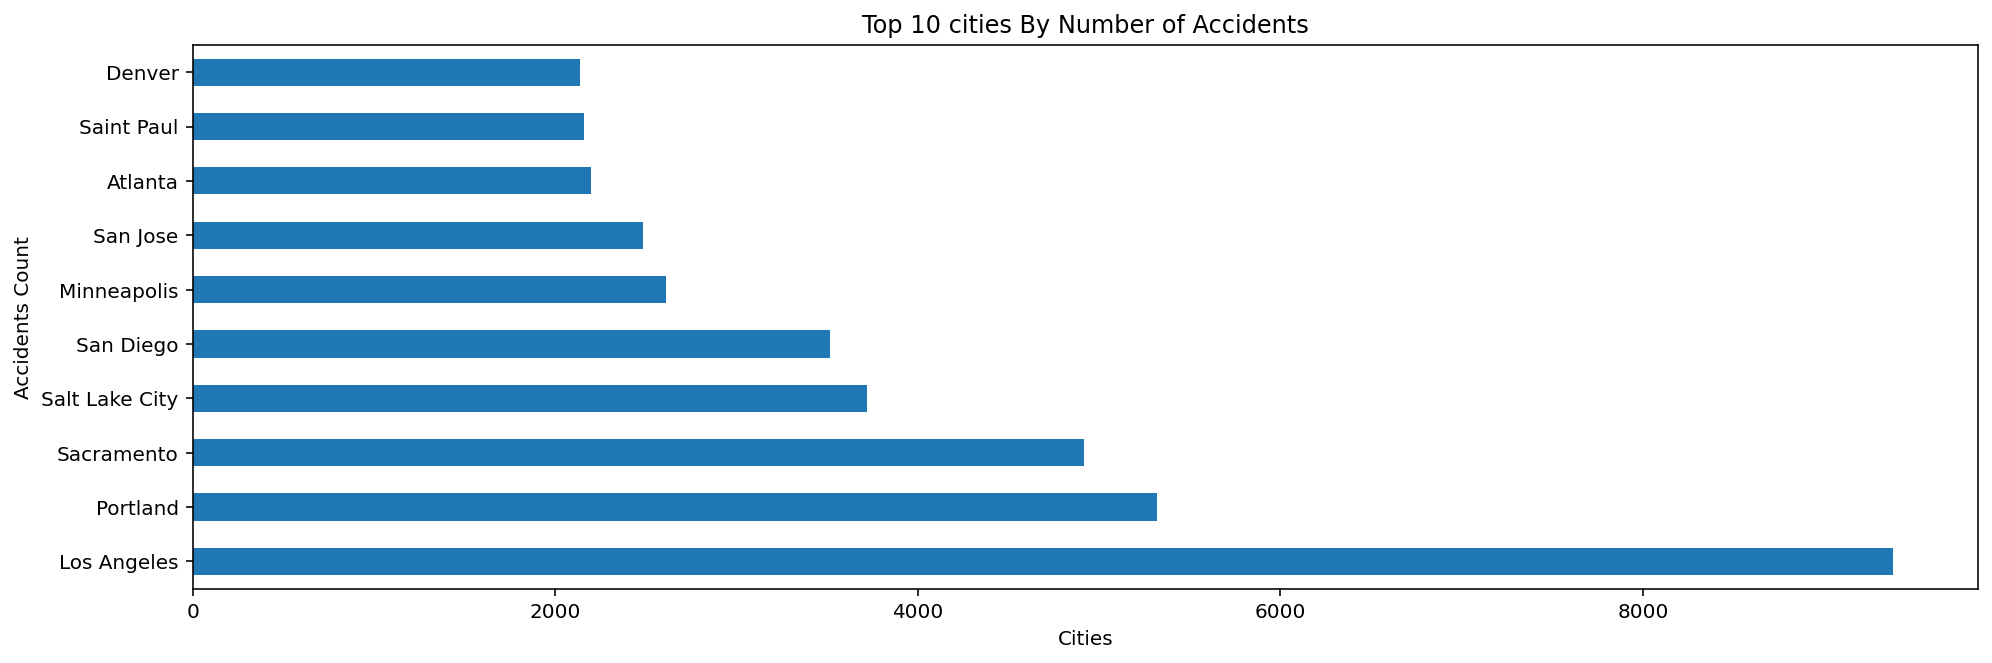

In [74]:
#Bar Chart to Visualize Top 10 cities by number of accidents

fig, ax = plt.subplots(figsize=(16,5))
accidents_by_cities[:10].plot(kind='barh')
ax.set(title = 'Top 10 cities By Number of Accidents',
       xlabel = 'Cities',
       ylabel = 'Accidents Count')
plt.show()

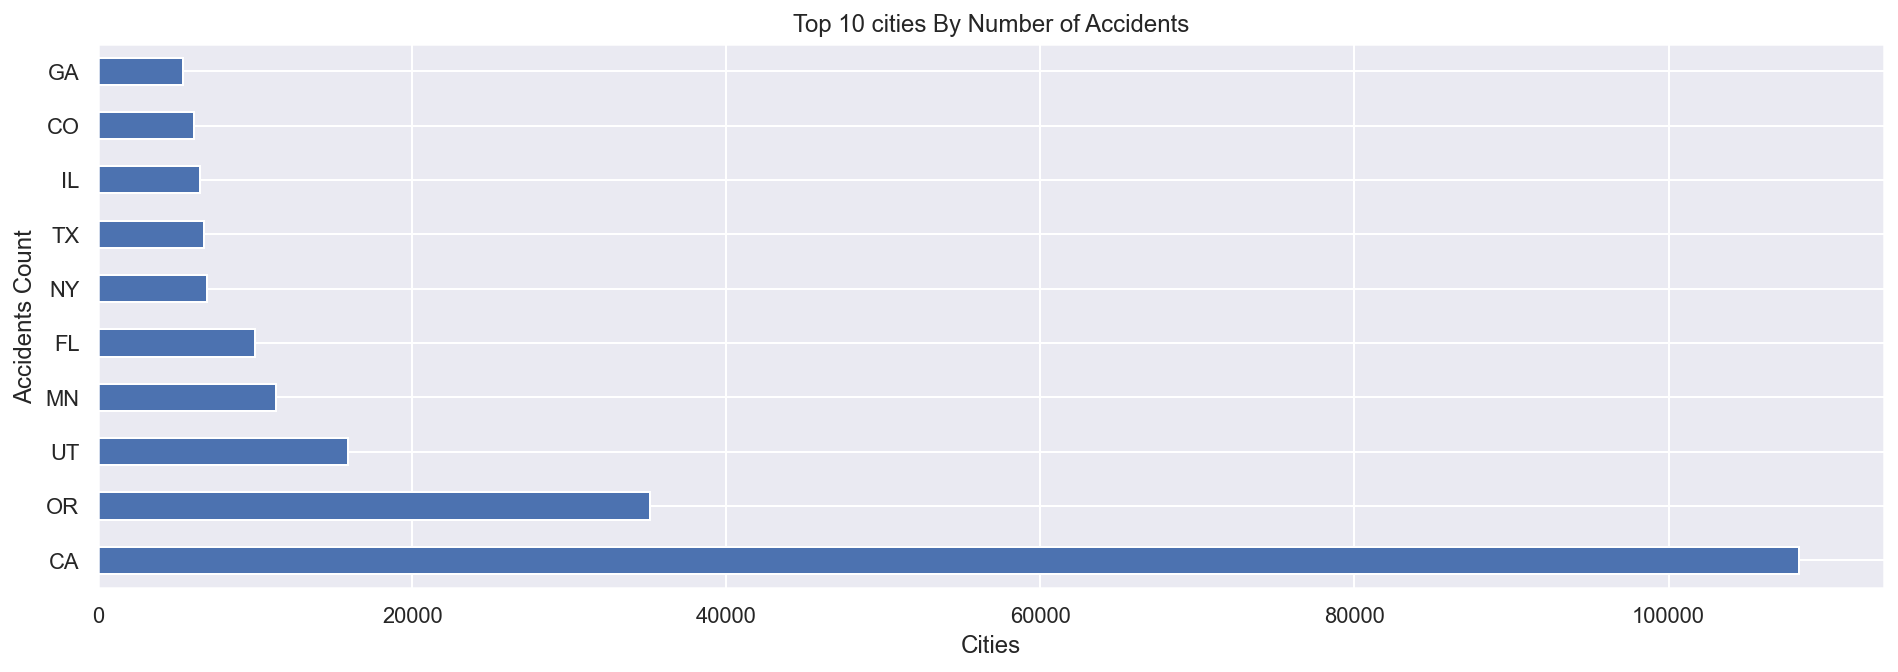

In [120]:
#Bar Chart to Visualize Top 10 cities by number of accidents
accidents_by_states = df_cp['State'].value_counts()

fig, ax = plt.subplots(figsize=(16,5))
accidents_by_states[:10].plot(kind='barh')
ax.set(title = 'Top 10 cities By Number of Accidents',
       xlabel = 'Cities',
       ylabel = 'Accidents Count')
plt.show()

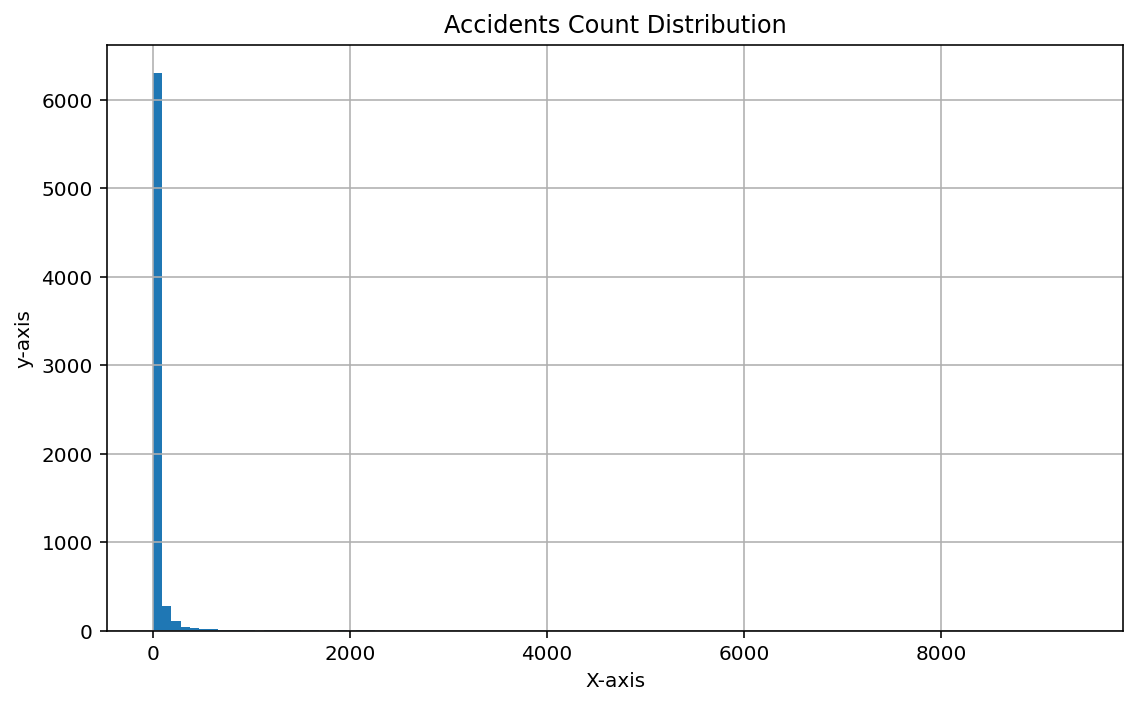

In [75]:
# Let's see how the accidents by cities is distributed

fig, axs = plt.subplots(1, 1,
                        figsize =(8, 5),
                        tight_layout = True)
accidents_by_cities.hist(bins=100)

plt.xlabel("X-axis")
plt.ylabel("y-axis")
plt.title('Accidents Count Distribution')

plt.show()

In [76]:
# Let's group the data by high and low

high_accident_cities = accidents_by_cities = accidents_by_cities[accidents_by_cities>=1000]
low_accident_cities = accidents_by_cities = accidents_by_cities[accidents_by_cities<1000]

In [77]:
# Let's find percentages

len(high_accident_cities)/len(cities)

0.004234194772959556

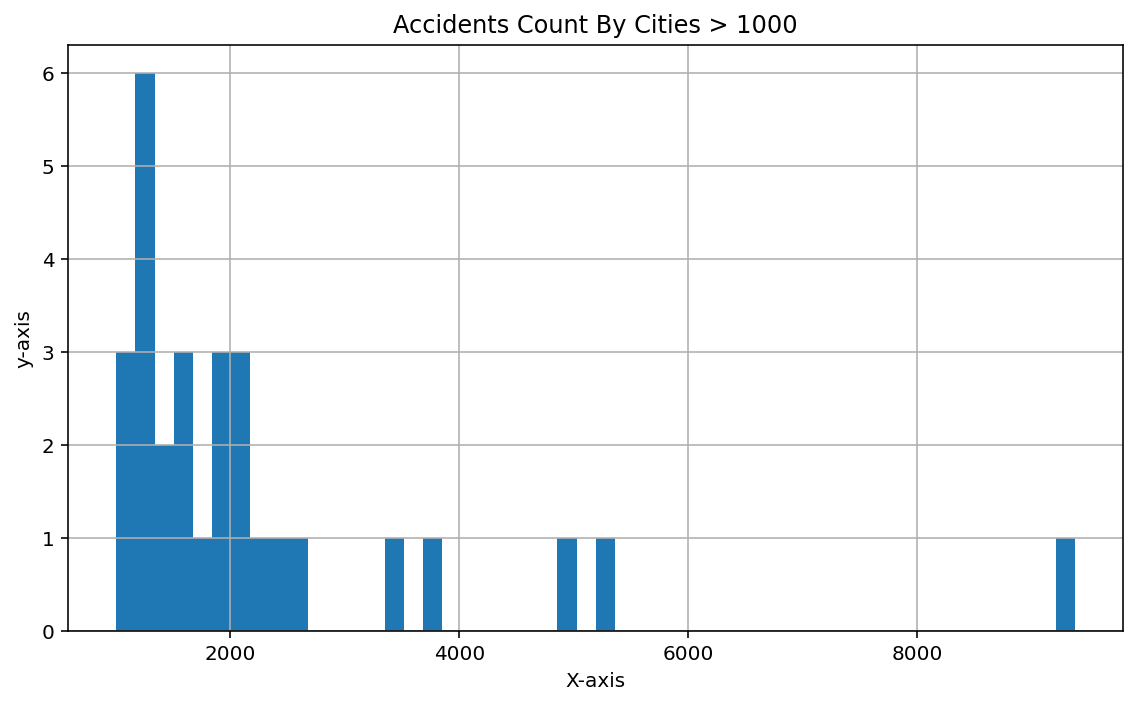

In [78]:
# Zoom in on the data distribution for cities with high accidents

fig, axs = plt.subplots(1, 1,figsize =(8, 5), tight_layout = True)

high_accident_cities.hist(bins = 50)

plt.xlabel("X-axis")
plt.ylabel("y-axis")
plt.title('Accidents Count By Cities > 1000')

plt.show()

## Accidents & Severity

In [79]:
# Accidents severity

accidents_severity = df_cp.groupby('Severity').count()['ID']
accidents_severity

Severity
2    206659
3     30735
4     24378
Name: ID, dtype: int64

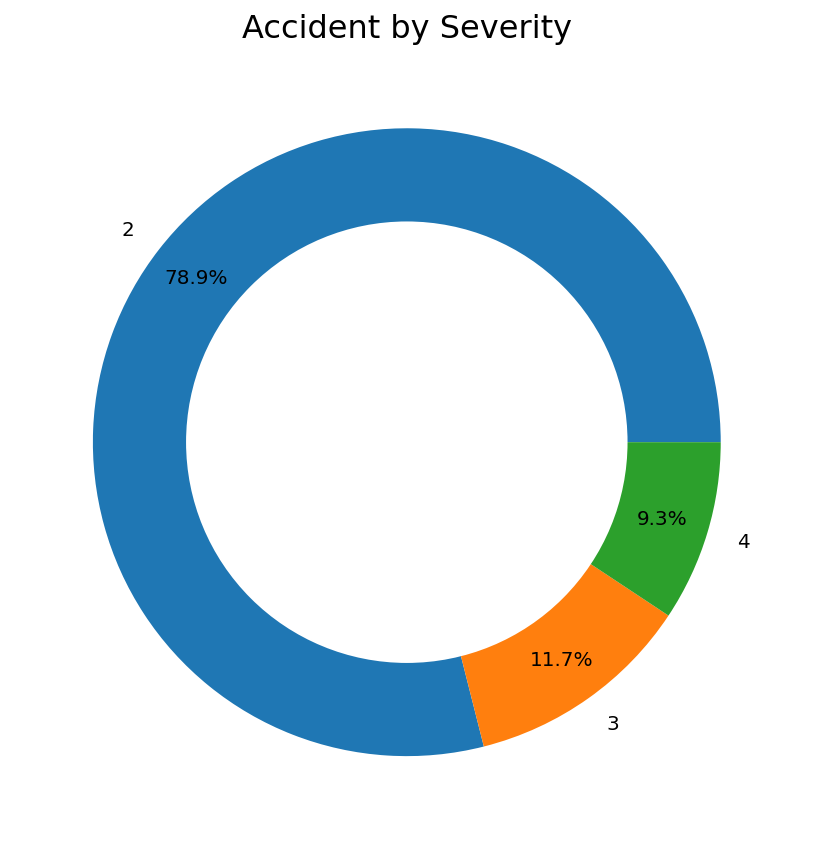

In [80]:
# Let's visualize that

fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))
label = [2,3,4]
plt.pie(accidents_severity, labels=label,
        autopct='%1.1f%%', pctdistance=0.85)
circle = plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
ax.set_title("Accident by Severity",fontdict={'fontsize': 16})
plt.tight_layout()
plt.show()

## Accidents & datas

In [81]:
# Let's work with the dates 
# (we find it's in wrong format, let's change that)

df_cp['Start_Time'].dtypes

dtype('<M8[ns]')

In [82]:
df_cp['End_Time'].dtypes

dtype('<M8[ns]')

In [83]:
df_cp = df_cp.astype({'Start_Time': 'datetime64[ns]', 'End_Time': 'datetime64[ns]'})
df_cp['Start_Time'].dtypes

dtype('<M8[ns]')

In [84]:
df_cp['Start_Time'][0]

Timestamp('2019-10-19 04:30:00')

In [85]:
df_cp['End_Time'][0]

Timestamp('2020-11-01 00:00:00')

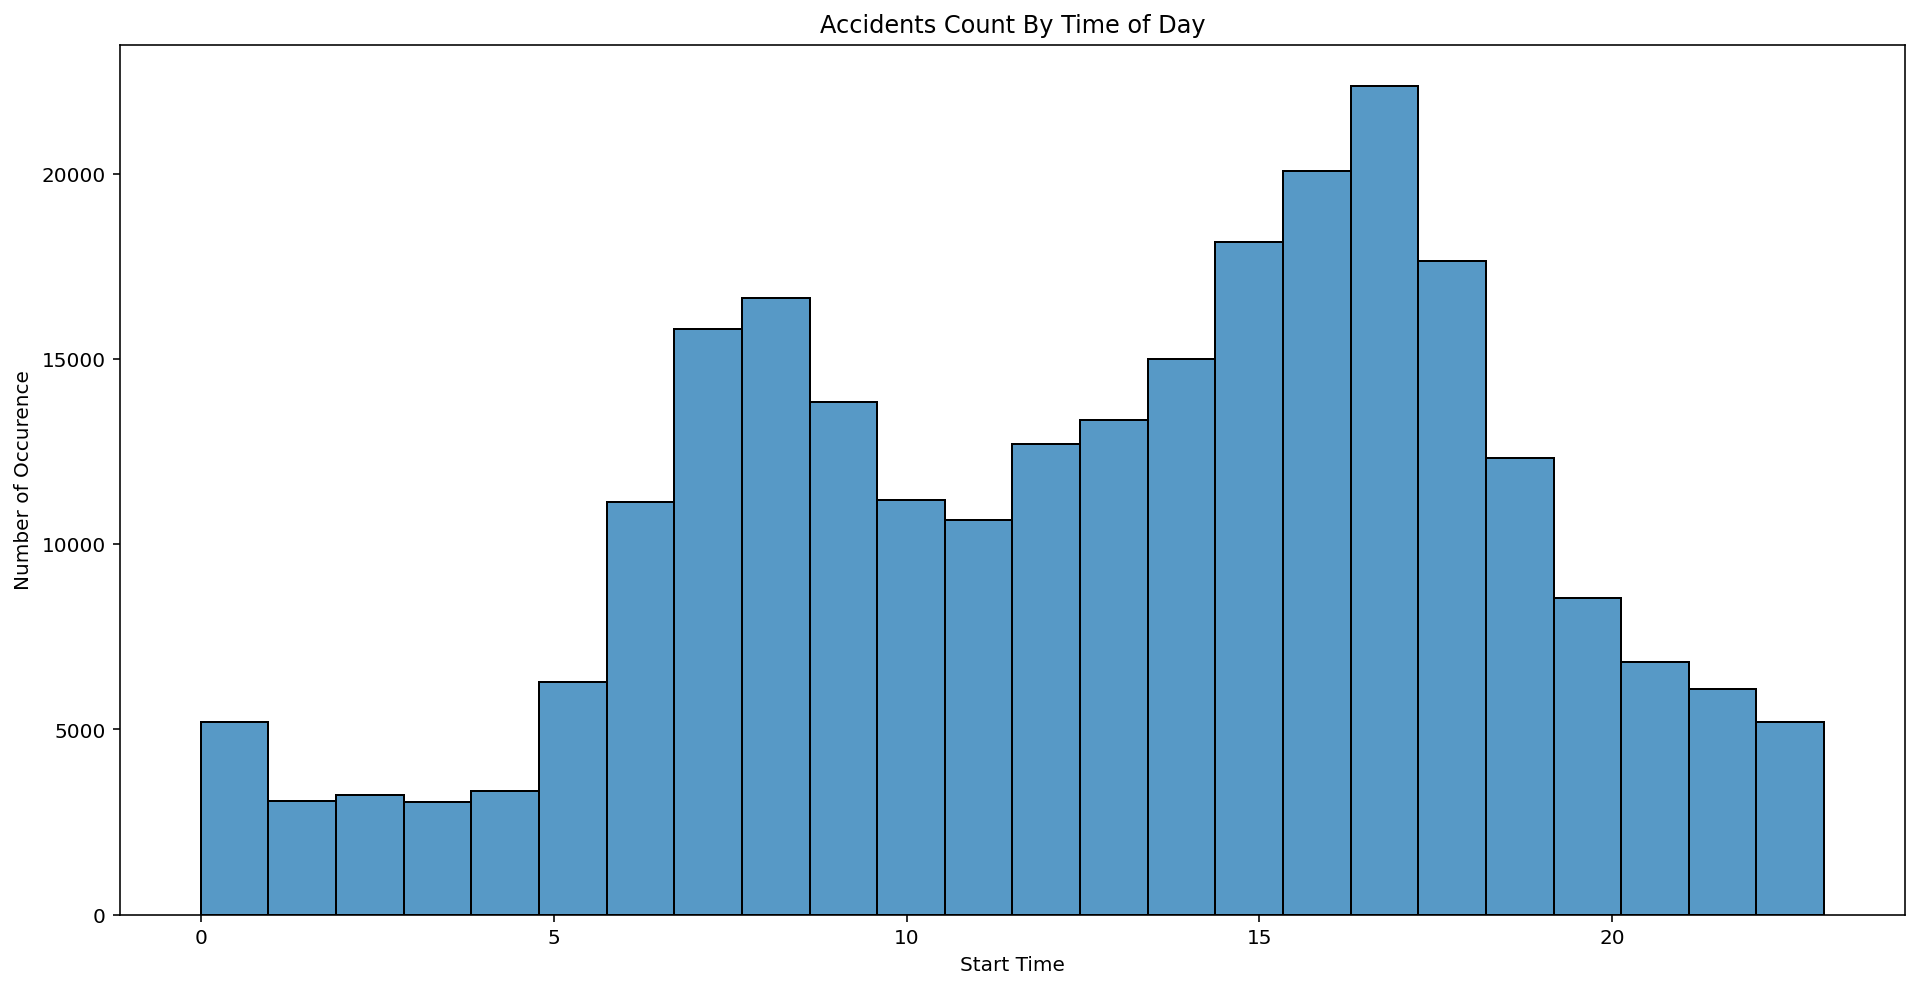

In [86]:
# Plot the distribution of occurence by time of the day.
# We can see the time of the day mof accidents happen, 4pm-6pm

fig, ax = plt.subplots(figsize=(16,8))
sns.histplot(df_cp['Start_Time'].dt.hour, bins = 24)

plt.xlabel("Start Time")
plt.ylabel("Number of Occurence")
plt.title('Accidents Count By Time of Day')

plt.show()

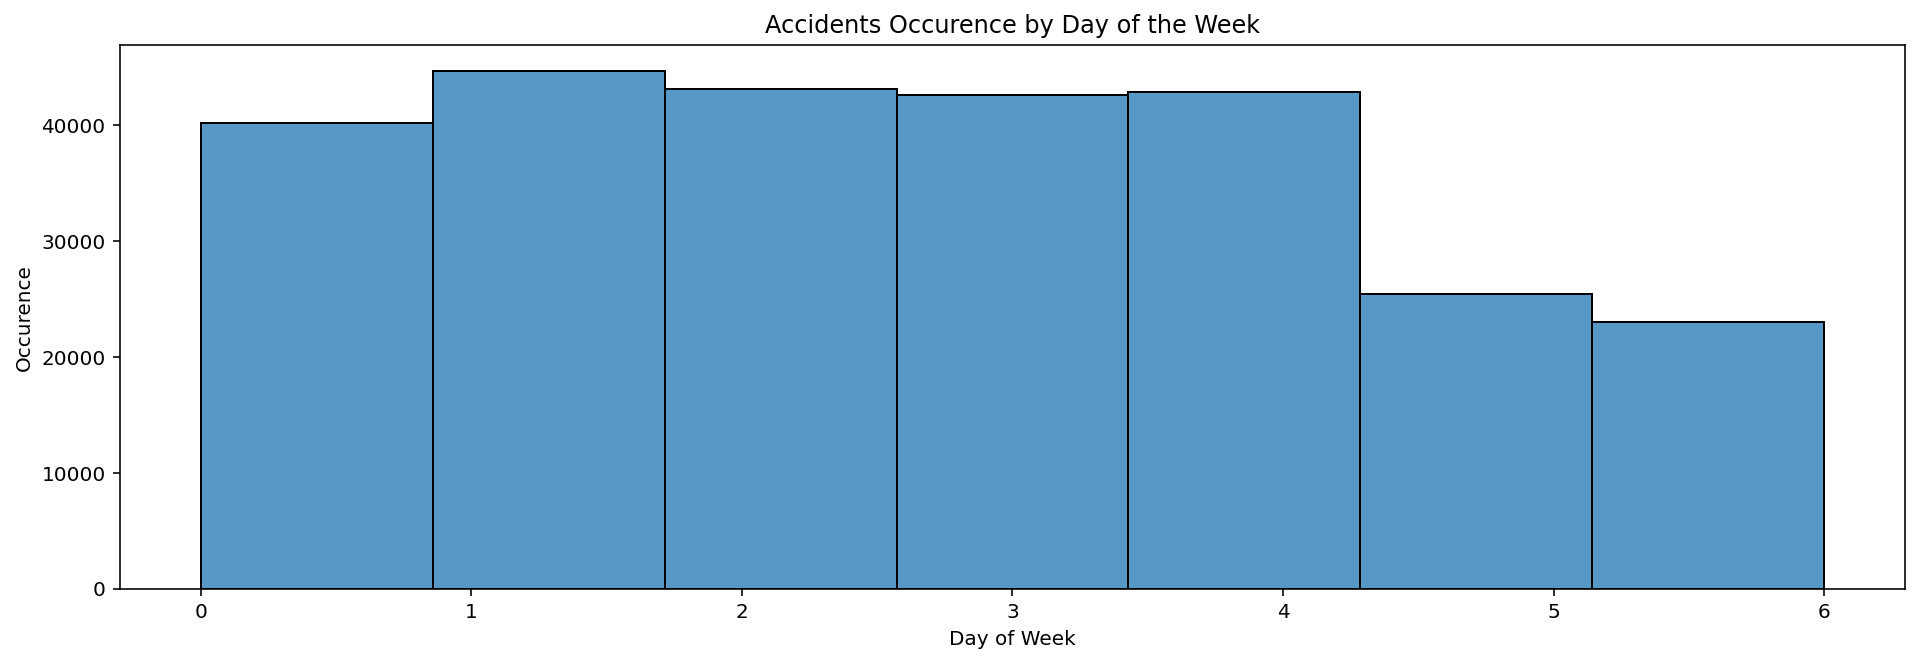

In [87]:
# Let's plot by day of the week 

fig, ax = plt.subplots(figsize=(16,5))
sns.histplot(df_cp['Start_Time'].dt.dayofweek, bins = 7)

plt.xlabel("Day of Week")
plt.ylabel("Occurence")
plt.title('Accidents Occurence by Day of the Week')

plt.show()

### lets look at weekends - Saturdays & Sundays

In [88]:
# Create a variable of the weekend days (Saturday & Sunday) for the next analysis

saturday = df_cp[df_cp['Start_Time'].dt.dayofweek == 5]
sunday = df_cp[df_cp['Start_Time'].dt.dayofweek == 6]

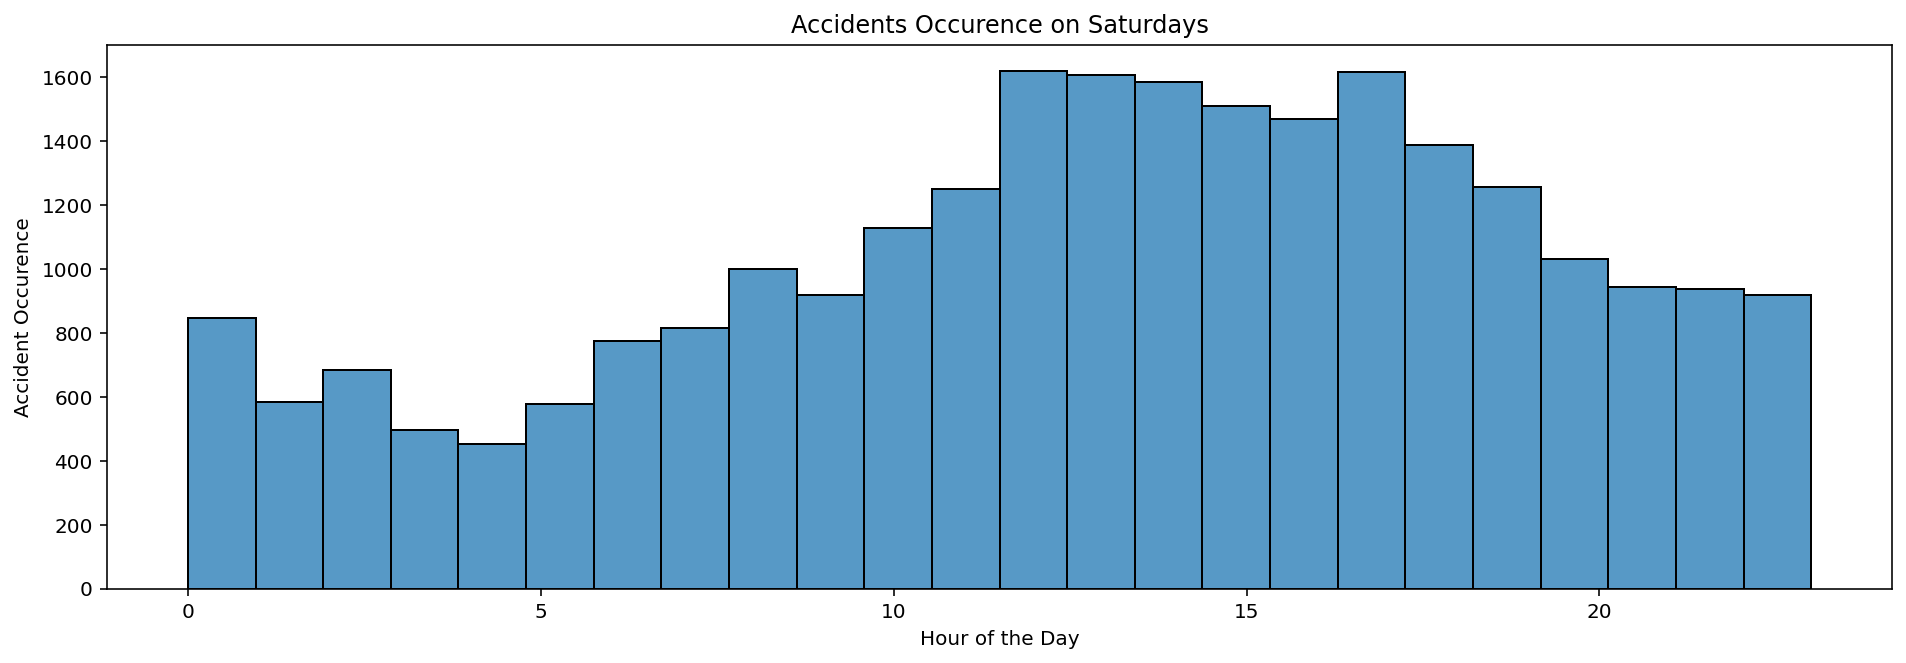

In [89]:
# The accident occurence pattern on Saturday is quite interesting. I have an idea why it is like this.

fig, ax = plt.subplots(figsize=(16,5))
sns.histplot(saturday['Start_Time'].dt.hour, bins = 24)

plt.xlabel("Hour of the Day")
plt.ylabel("Accident Occurence")
plt.title('Accidents Occurence on Saturdays')

plt.show()

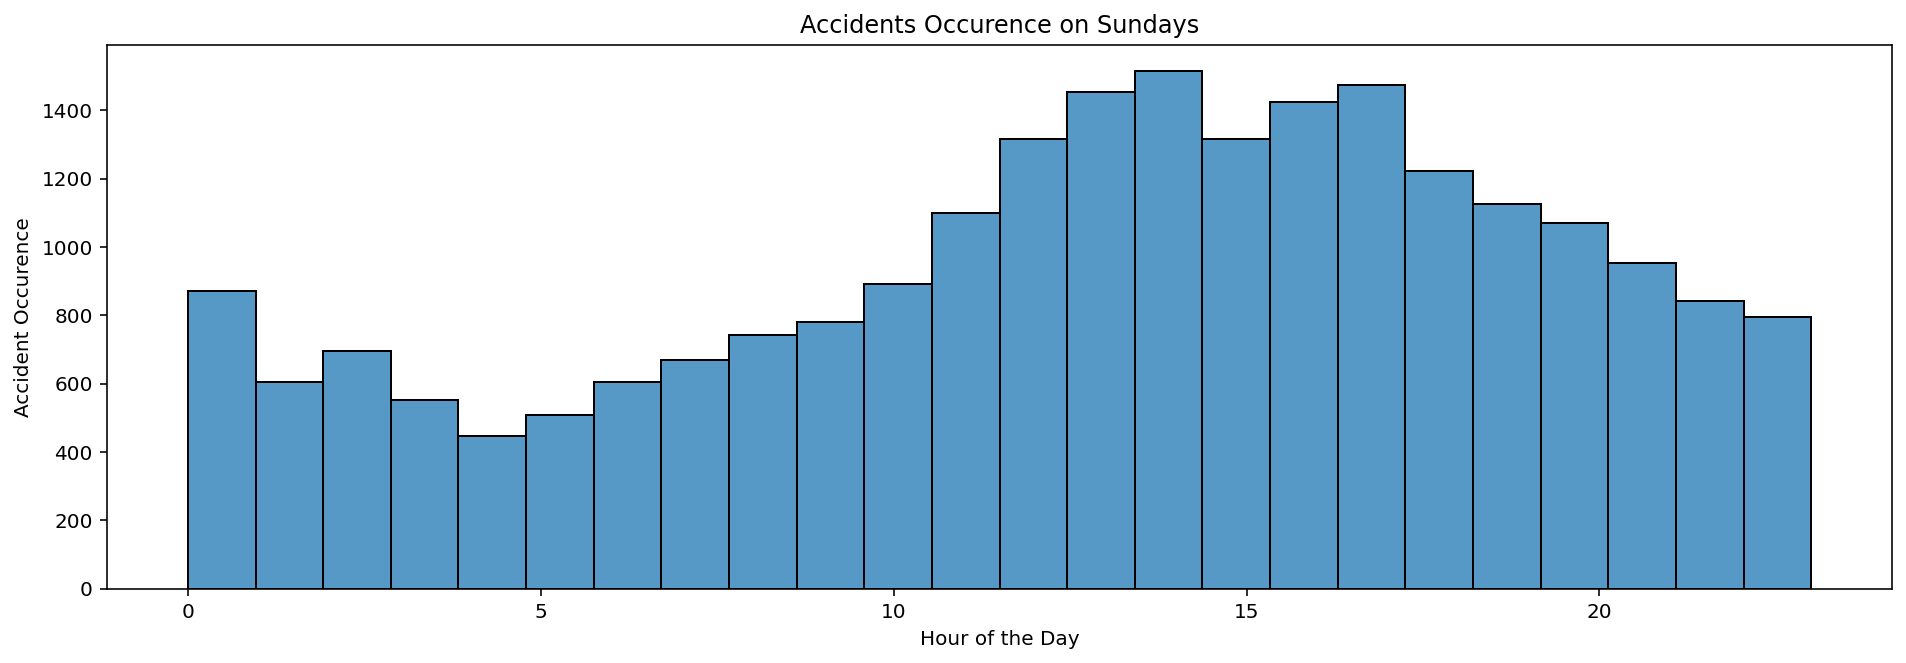

In [90]:
# this is even more interesting.

fig, ax = plt.subplots(figsize=(16,5))
sns.histplot(sunday['Start_Time'].dt.hour, bins = 24)

plt.xlabel("Hour of the Day")
plt.ylabel("Accident Occurence")
plt.title('Accidents Occurence on Sundays')

plt.show()

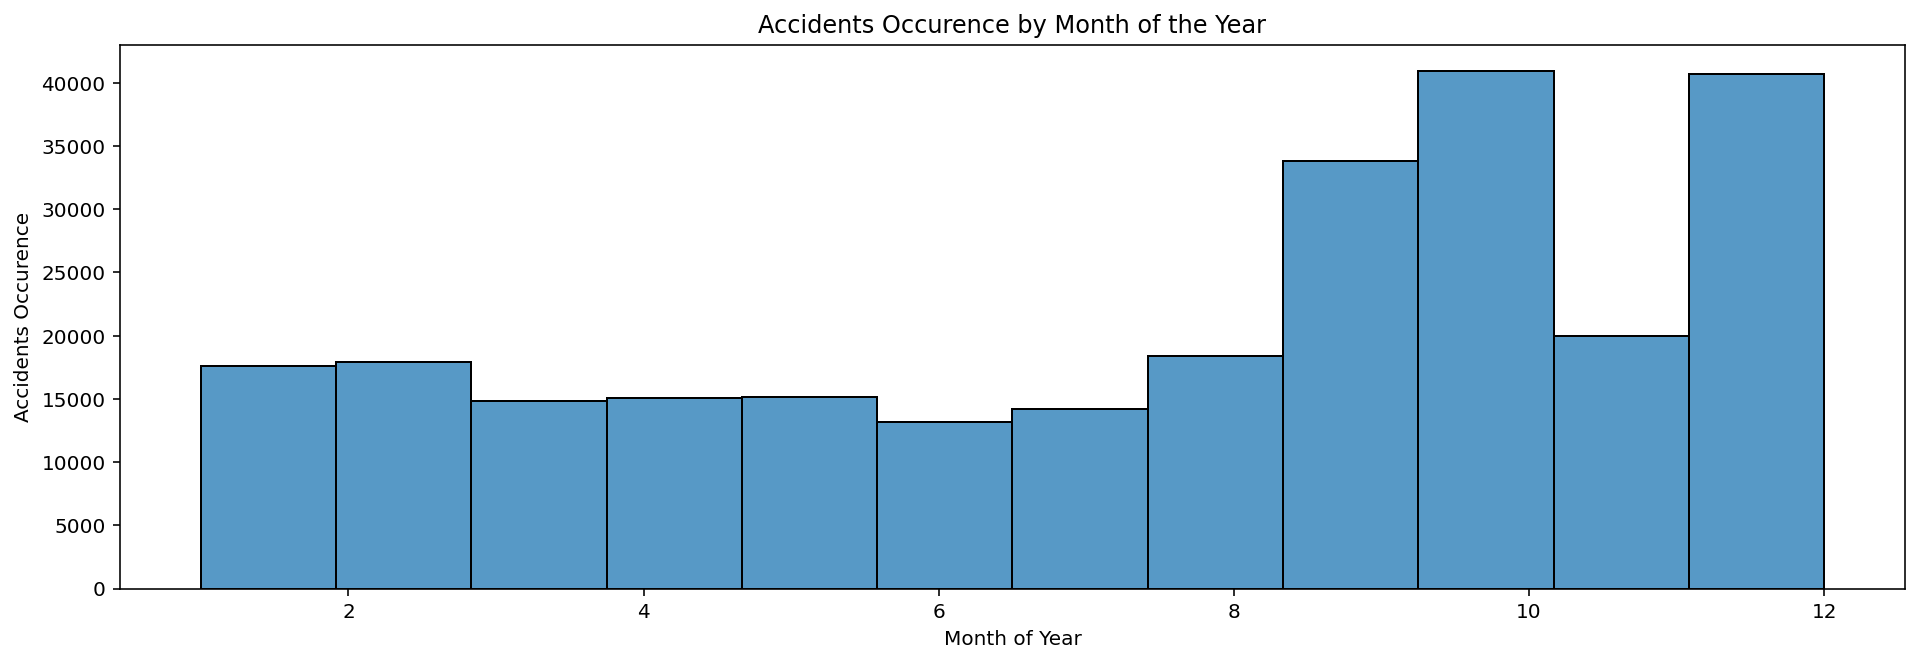

In [91]:
#Moving on, we can plot by month of the year

fig, ax = plt.subplots(figsize=(16,5))
sns.histplot(df_cp['Start_Time'].dt.month, bins = 12)

plt.xlabel("Month of Year")
plt.ylabel("Accidents Occurence")
plt.title('Accidents Occurence by Month of the Year')

plt.show()

### Side of the road 

In [92]:
# Moving on, what side of the road are accidents happening?

side_of_road =  df_cp.groupby(['Side']).count()['ID']
side_of_road

Side
L     33563
R    228209
Name: ID, dtype: int64

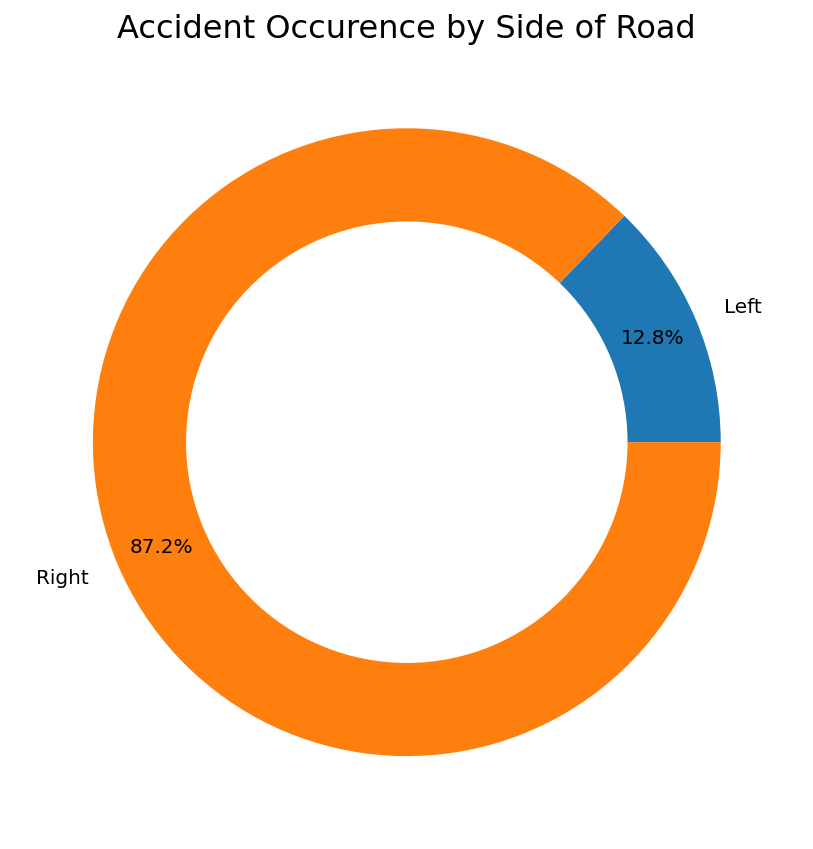

In [93]:
#Let's visualize that

fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))
label = ['Left', 'Right']
plt.pie(side_of_road, labels=label,
        autopct='%1.1f%%', pctdistance=0.85)
circle = plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
ax.set_title("Accident Occurence by Side of Road",fontdict={'fontsize': 16})
plt.tight_layout()
plt.show()

### Weather Condition

In [94]:
# What are the weather conditions at the time of accicent occurence

weather_conditions = df_cp.groupby(['Weather_Condition']).count()['ID']
weather_conditions

Weather_Condition
Blowing Dust                 32
Blowing Dust / Windy         20
Blowing Snow                 31
Blowing Snow / Windy          4
Clear                     13402
                          ...  
Thunderstorm                  3
Thunderstorms and Rain       25
Tornado                       2
Wintry Mix                  282
Wintry Mix / Windy            2
Name: ID, Length: 83, dtype: int64

In [95]:
# Weather conditions at time of occurence sorted

weather_conditions.sort_values(ascending=False)

Weather_Condition
Fair                      99281
Cloudy                    31830
Mostly Cloudy             30455
Partly Cloudy             27659
Clear                     13402
                          ...  
Hail                          1
Heavy Freezing Drizzle        1
Light Rain Showers            1
Low Drifting Snow             1
Heavy Blowing Snow            1
Name: ID, Length: 83, dtype: int64

In [96]:
# Time of accident occurence sorted and filtered to top 20

weather_conditions.sort_values(ascending=False)[:20]

Weather_Condition
Fair                       99281
Cloudy                     31830
Mostly Cloudy              30455
Partly Cloudy              27659
Clear                      13402
Overcast                   12153
Light Rain                 11997
Light Snow                  5711
Haze                        3273
Fog                         3263
Scattered Clouds            3125
Rain                        2779
Fair / Windy                1307
Heavy Rain                   983
Snow                         838
Cloudy / Windy               586
Light Drizzle                535
Mostly Cloudy / Windy        473
Partly Cloudy / Windy        402
Thunder in the Vicinity      368
Name: ID, dtype: int64

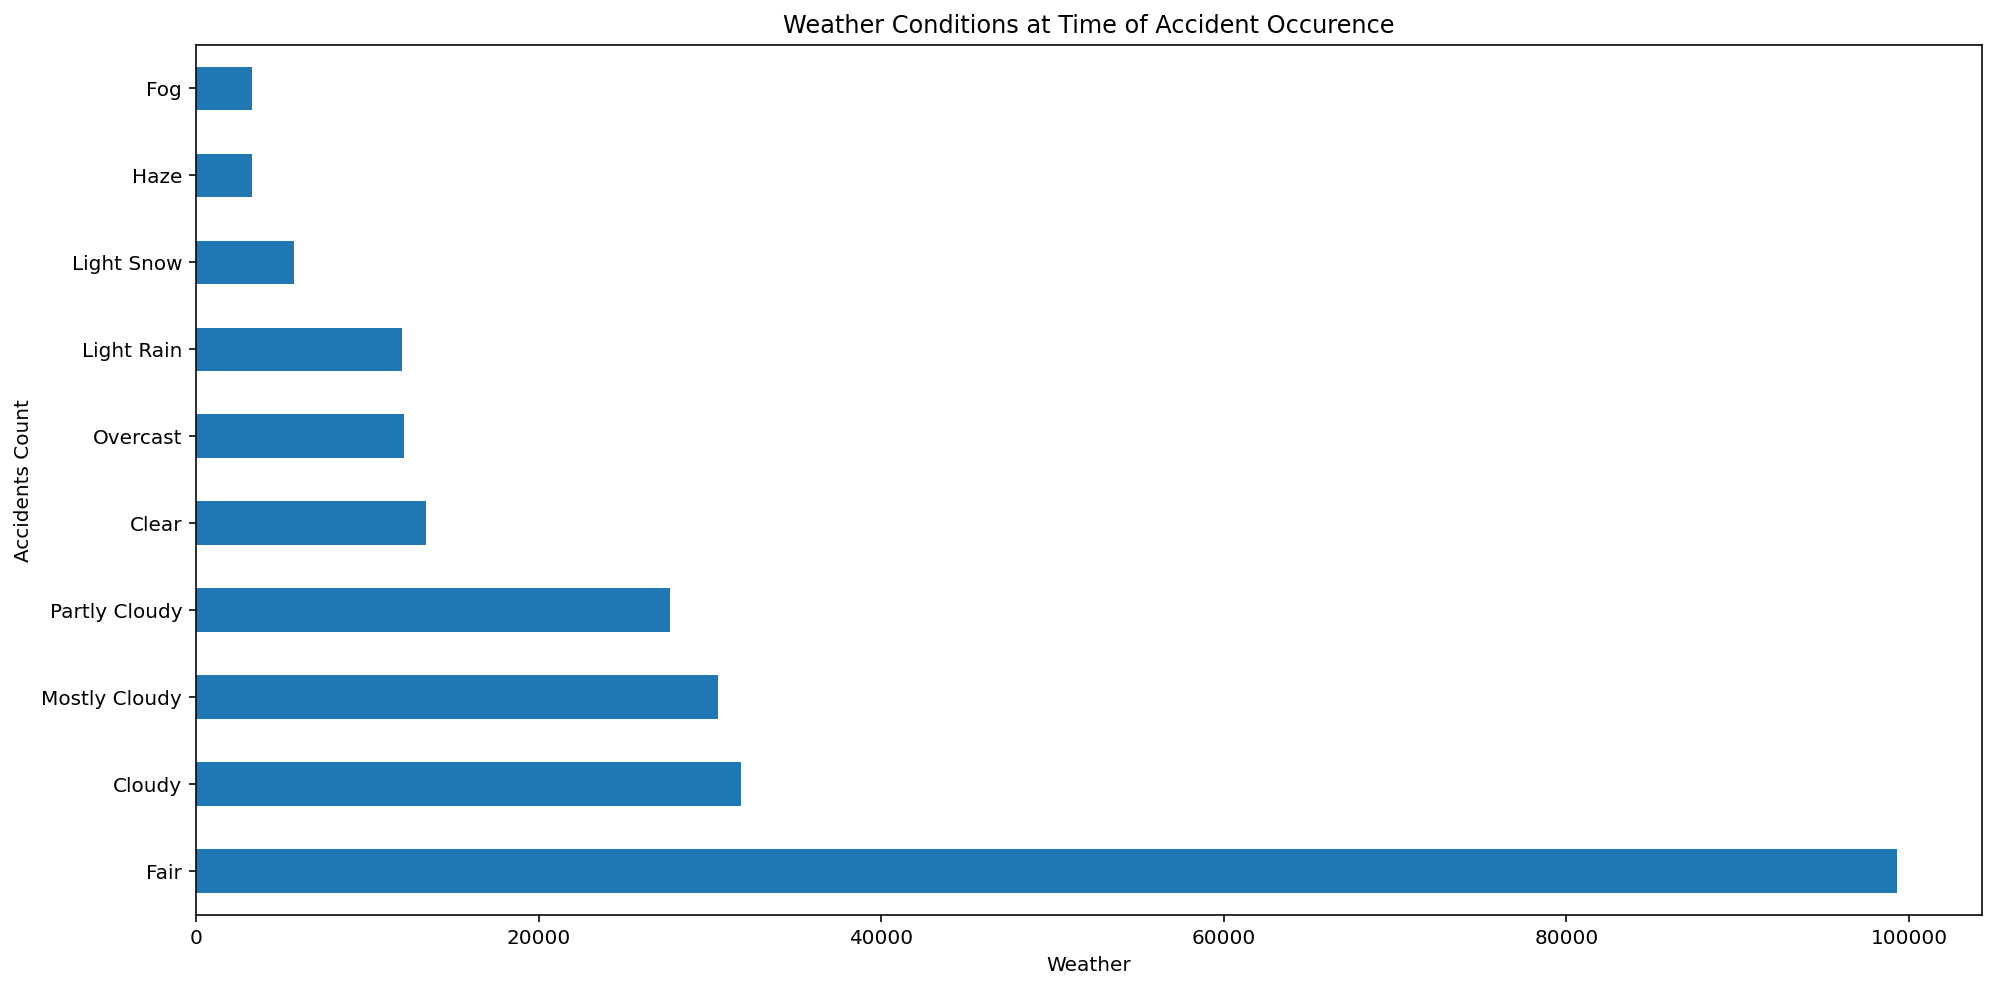

In [99]:
# Let's visualize top 20 weather conditions at the time of accident occurence

fig, ax = plt.subplots(figsize=(16,8))
weather_conditions.sort_values(ascending=False)[:10].plot(kind='barh')
ax.set(title = 'Weather Conditions at Time of Accident Occurence',
       xlabel = 'Weather',
       ylabel = 'Accidents Count')
plt.show()

## Findings
Accidents more likely to happen in peak hours (Morning & evening). This could be explained by having more people on the road heading to work or business activities.

Accidents happened more frequently on the right side of the road.

Week days (work days) recorded more accidents than weekends.

Accidents happened less frequently in summer months, than winter months. However, looking at the data, much data was not collected in some summer months - so, this could skew the analysis.

A further probe of the data sources is recommended in other to ascertain the irregularities of the histograms for 2016, and 2020. Was enough data captured in these years? Could reveal more insights.

Surprisingly, most accidents happened when the weather was 'fair'. Perhaps weather (bad weather) was not a big contributing factor to accidents.

Los Angeles was the city with the highest number of accidents but take note that there was no data from New York (the most populated city in the US). So, I would imagine NY would have had the highest?

### Looking at longitude and lattitude

<AxesSubplot:xlabel='Start_Lng', ylabel='Start_Lat'>

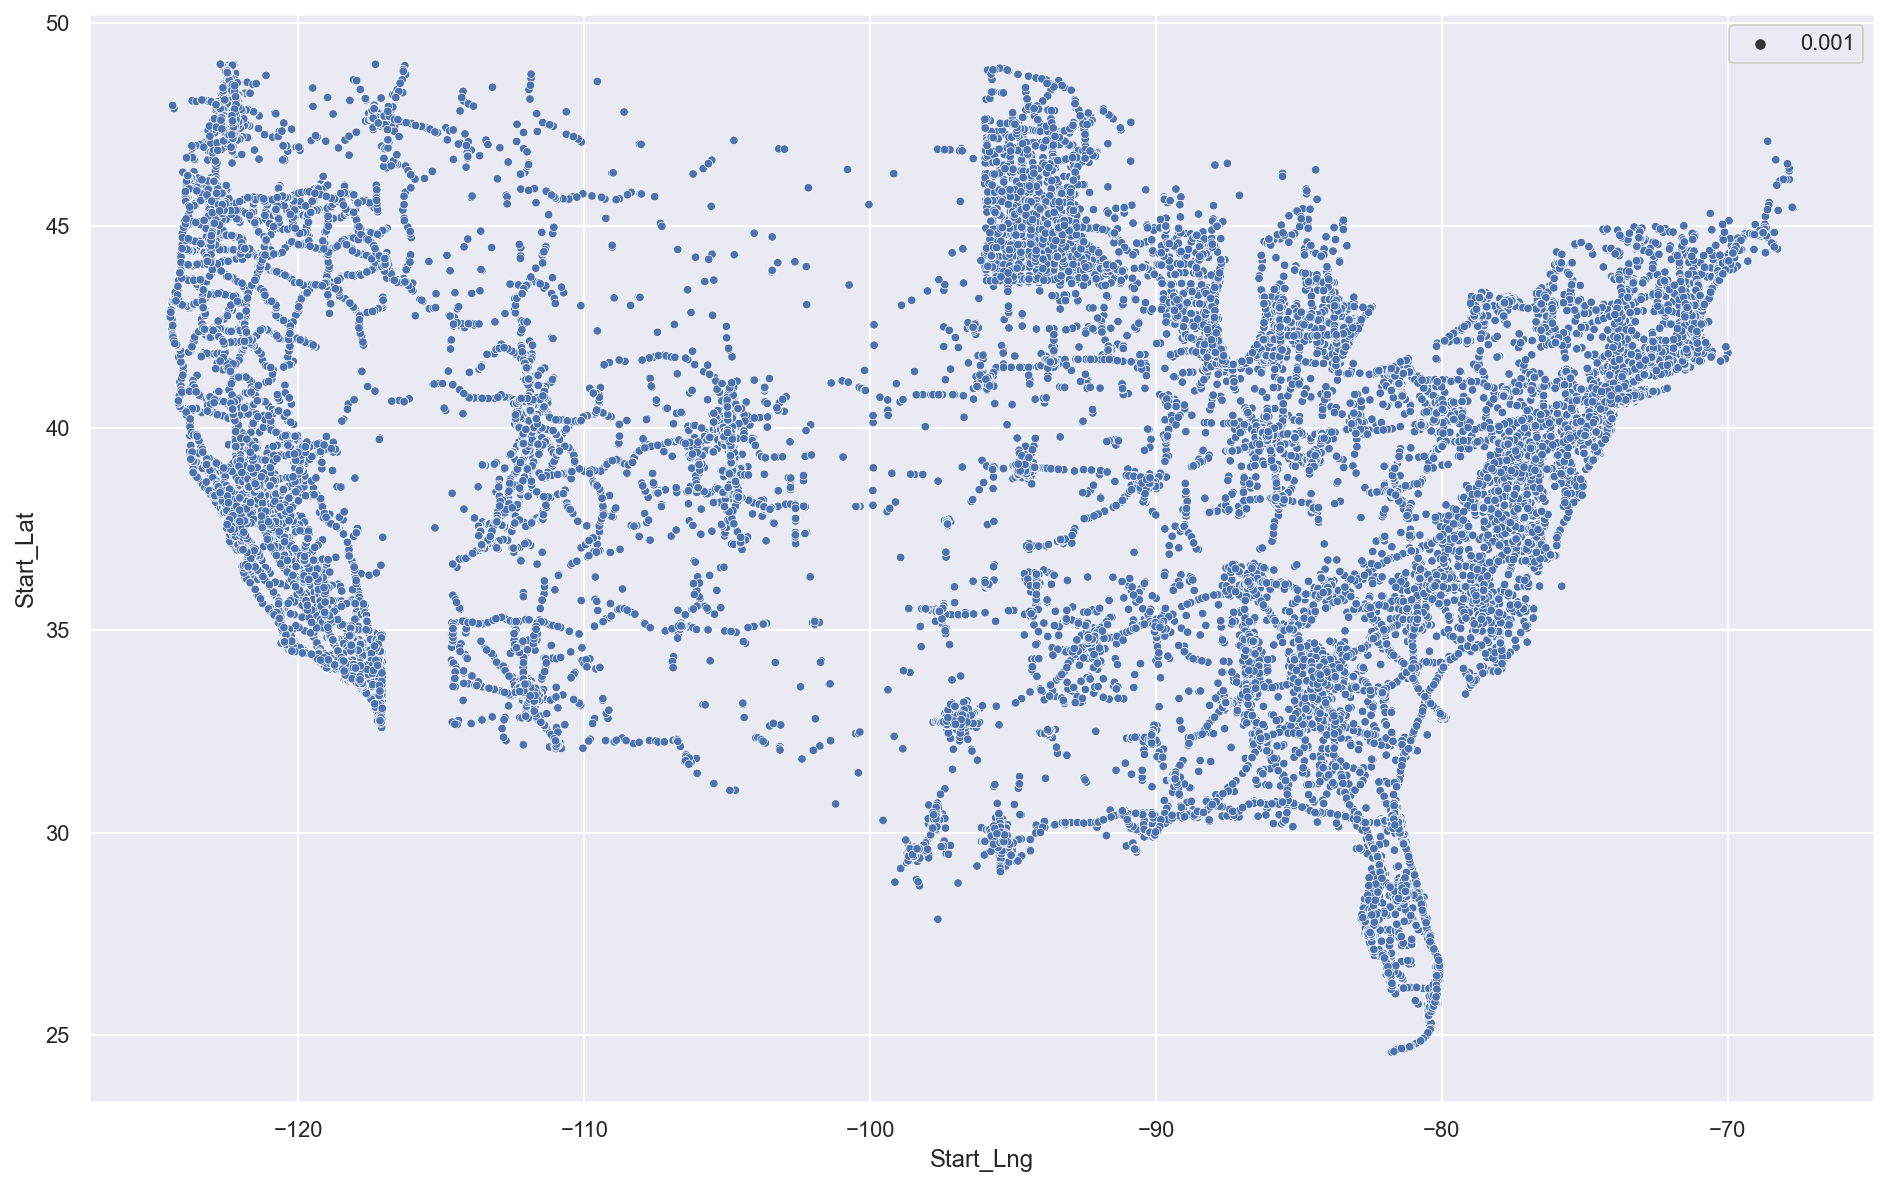

In [104]:
sns.set(rc={'figure.figsize':(16,10)})
sns.scatterplot(x=df_cp.Start_Lng, y=df_cp.Start_Lat, size=0.001)

In [107]:
#! pip install folium
import folium

     |████████████████████████████████| 95 kB 3.9 MB/s eta 0:00:011


In [109]:
lat, lon = df_cp.Start_Lat[0], df_cp.Start_Lng[0]
lat, lon

(38.87554, -77.280396)

In [110]:
for x in df_cp[['Start_Lat', 'Start_Lng']].sample(100).iteritems():
    print(x[1])

8850      36.326699
186200    37.300860
15664     37.408367
123434    33.852843
39490     36.605354
            ...    
114259    34.071987
64036     45.370720
232025    33.891767
28994     41.041620
9013      27.984350
Name: Start_Lat, Length: 100, dtype: float64
8850     -119.211913
186200   -121.814690
15664    -122.068737
123434   -118.279659
39490    -119.660995
             ...    
114259   -117.884375
64036    -122.749290
232025   -118.043002
28994    -111.909690
9013      -82.453840
Name: Start_Lng, Length: 100, dtype: float64


In [112]:
zip(list(df_cp.Start_Lat), list(df_cp.Start_Lng))

In [113]:
from folium.plugins import HeatMap

In [116]:
sample_df = df_cp.sample(int(0.001 * len(df_cp)))
lat_lon_pairs = list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))

In [117]:
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map

In [118]:
#plotting the marker points on US map with sample size of 0.1% of wholw dataset
sample_df_2 =df_cp.sample(int(0.001 * len(df_cp))) #creating a sample of 0.01%

#creating a variable containing the list of latitudes and longitudes
locations = sample_df_2[['Start_Lat', 'Start_Lng']]
locationlist = locations.values.tolist()
len(locationlist)
locationlist[0]

#plotting the markers on the US map using folium library
map = folium.Map(zoom_start=12)
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point]).add_to(map)
map

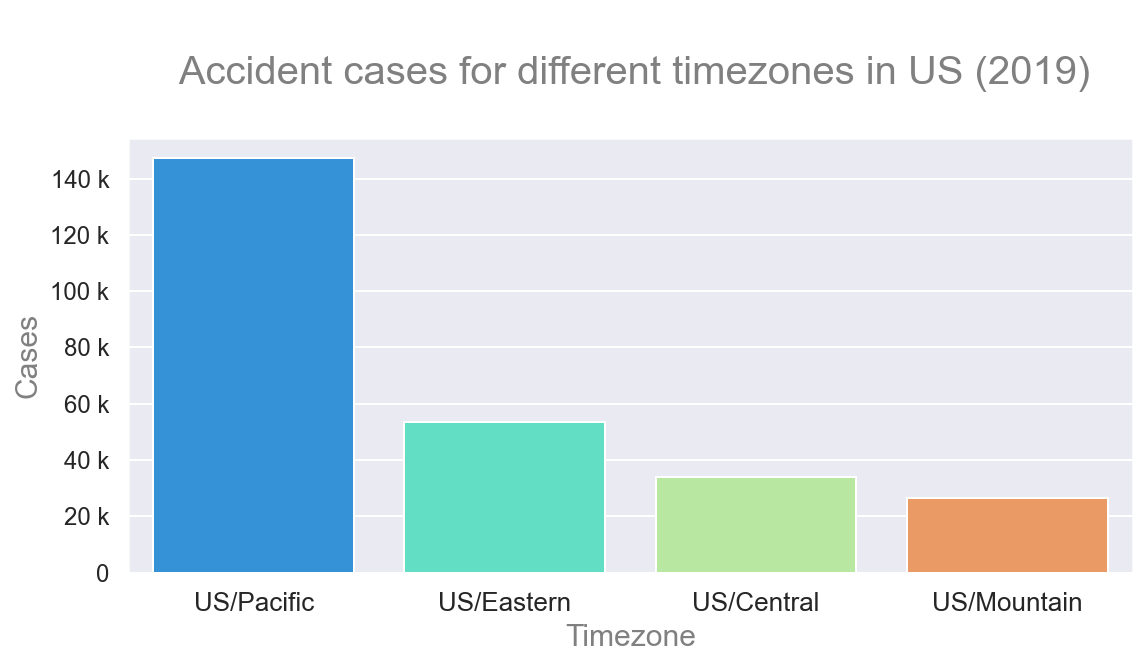

In [121]:
timezone = pd.DataFrame(df_cp.Timezone.value_counts()).reset_index().rename(columns={"index":"Timezone","Timezone":"Cases"})
plt.figure(figsize=(9,4))
plt.title('\n Accident cases for different timezones in US (2019)\n', size=20, color='grey')
plt.xlabel('\n Timezone \n', fontsize=15, color='grey')
plt.ylabel('\nAccident Cases\n', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
a = sns.barplot(x=timezone.Timezone , y=timezone.Cases,palette="rainbow")
import matplotlib.ticker as ticker
a.yaxis.set_major_formatter(ticker.EngFormatter())
plt.show()